Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period, identify which factors predict future user
adoption.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
pwd

'C:\\Users\\19713\\Desktop\\Springboard'

In [3]:
engagement = pd.read_csv('C:\\Users\\19713\\Desktop\\Springboard\\takehome_user_engagement.csv', parse_dates = True)
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
data = pd.read_csv('C:\\Users\\19713\\Desktop\\Springboard\\takehome_users.csv', encoding='latin-1', parse_dates = True)
data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [6]:
engagement.shape

(207917, 3)

In [7]:
engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [8]:
engagement.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [9]:
engagement.columns

Index(['time_stamp', 'user_id', 'visited'], dtype='object')

In [10]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [11]:
import datetime

#set the time_stamp to datetime and the set it as the index
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])
engagement = engagement.set_index('time_stamp', drop= True)

In [12]:
from datetime import timedelta

def label_adopted(x):    
    "takes a users input and returns whether or not they have been active within any 7-day period"
    df_temp = engagement.loc[engagement['user_id'] == x] #select out rows of this user
    df_temp = df_temp.resample('D').mean().dropna() #resample to show if active in a day. .mean() is just of 1
    adopted = 0
    for i in range(len(df_temp)-2): #loop over active days till the second to last day
        if df_temp.index[i + 2] - df_temp.index[i] <= timedelta(days=7): # difference between every 1st and 3rd day
            adopted = 1
            break
        else:
            adopted = 0
    return adopted

In [13]:
# apply adopted to data df to label users as adopted = true
data['adopted_user'] = data['object_id'].apply(label_adopted)

In [14]:
print('There were {} adopted users out of {} users.'.format(
sum(data['adopted_user']), len(data['adopted_user'])))

There were 1656 adopted users out of 12000 users.


### Data Wrangling

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted_user                12000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [16]:
# convert 'creation_time' column to date-time object
data['creation_time'] = pd.to_datetime(data['creation_time'])

#last_session_creation_time is a unix time stamp, so use map to convert to date-time
data['last_session_creation_time'] = data['last_session_creation_time'].map(lambda x: 
                                    datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'),
                                                                              na_action='ignore')

Let's subtract `creation time` from `last_session_creation_time` to create a new feature `usage_length` which tells us how long a user has been active.

In [17]:
# set 'last_session_creation_time' to date-time object
data['last_session_creation_time'] = pd.to_datetime(data['last_session_creation_time'])

# subtract to find time active
data['usage_length'] = data['last_session_creation_time'] - data['creation_time']

# let's convert to seconds instead of days to make the time differences more distinct
data['usage_length'] = [x.total_seconds() for x in data['usage_length']]

In [18]:
# replace all negative values in usage_length with 0
data.loc[data['usage_length'] < 0, 'usage_length'] = 0

In [19]:
data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,usage_length
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-21 20:53:30,1,0,11,10803.0,0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-30 20:45:04,0,0,1,316.0,1,11725200.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 16:14:52,0,0,94,1525.0,0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 01:09:28,0,0,1,5151.0,0,61200.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 02:14:20,0,0,193,5240.0,0,403200.0


So far so good. We can also use the email domain as a feature as well. There are only a few main ones, so I will label the other ones as other.

In [20]:
# create column based on email domain
data['email_provider'] = [x.split('@')[1] for x in data['email']]
top_emails = data['email_provider'].value_counts().index[:6]
# label anything else not in the top 5 as other
data['email_provider'] = [x if x in top_emails else 'other' for x in data['email_provider']]

We can also use `invited_by_user_id` as a feature, but first we will need to fill all null values in this column.

In [21]:
data['invited_by_user_id'] = data['invited_by_user_id'].fillna(0)

In [22]:
data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,usage_length,email_provider
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-21 20:53:30,1,0,11,10803.0,0,0.0,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-30 20:45:04,0,0,1,316.0,1,11725200.0,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 16:14:52,0,0,94,1525.0,0,0.0,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 01:09:28,0,0,1,5151.0,0,61200.0,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 02:14:20,0,0,193,5240.0,0,403200.0,yahoo.com


There are a few features here that will not be useful for analysis. These features are: `object_id`, `creation_time`, `name`, `email`, and `last_session_creation_time`.

In [23]:
features_df = data.iloc[:,4:]
features_df = features_df.drop('last_session_creation_time', axis = 1)

In [24]:
features_df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,usage_length,email_provider
0,GUEST_INVITE,1,0,11,10803.0,0,0.0,yahoo.com
1,ORG_INVITE,0,0,1,316.0,1,11725200.0,gustr.com
2,ORG_INVITE,0,0,94,1525.0,0,0.0,gustr.com
3,GUEST_INVITE,0,0,1,5151.0,0,61200.0,yahoo.com
4,GUEST_INVITE,0,0,193,5240.0,0,403200.0,yahoo.com


In [25]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   org_id                      12000 non-null  int64  
 4   invited_by_user_id          12000 non-null  float64
 5   adopted_user                12000 non-null  int64  
 6   usage_length                8823 non-null   float64
 7   email_provider              12000 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 750.1+ KB


In [26]:
features_df['usage_length'] = features_df['usage_length'].fillna(0)

`sklearn.preprocessing.LabelEncoder` encodes target labels with value between 0 and n_classes - 1. We can use this to engineer categorical labels for each categorical feature.

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

creation_labels = le.fit_transform(data['creation_source'])
features_df['creation_source'] = creation_labels

org_id_labels = le.fit_transform(data['org_id'])
features_df['org_id'] = org_id_labels

invited_labels = le.fit_transform(data['invited_by_user_id'])
features_df['invited_by_user_id'] = invited_labels

email_labels = le.fit_transform(data['email_provider'])
features_df['email_provider'] = email_labels

In [28]:
features_df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,usage_length,email_provider
0,0,1,0,11,2325,0,0.0,6
1,1,0,0,1,56,1,11725200.0,2
2,1,0,0,94,298,0,0.0,2
3,0,0,0,1,1104,0,61200.0,6
4,0,0,0,193,1127,0,403200.0,6


We know have prepared our features for analysis.

### Analysis

Since we have a small feature set and sample size, `Kneighbors` and `RandomForestClassifier` are both good choices for this data set. However, since we have a mix of both categorical and numerical data, let's go ahead and implement `RandomForestClassifier`, as it will be easiest to implement.

In [29]:
from sklearn.model_selection import train_test_split

# set up data by separating out the labels, then split for cross validation
X = features_df.drop('adopted_user', axis = 1)
y = features_df['adopted_user']

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [30]:
from sklearn.ensemble import RandomForestClassifier

# train and test classifier
rf = RandomForestClassifier(class_weight = 'balanced_subsample')

rf.fit(X_train, X_test)

rf.score(y_train, y_test)

0.9742424242424242

The model is very accurate with an accuracy of 97%. Let's take a look at some metrics to verify the efficacy of this model.

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

# print out classification report and confusion matrix
y_pred = rf.predict(y_train)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:')
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3407
           1       0.93      0.89      0.91       553

    accuracy                           0.97      3960
   macro avg       0.95      0.94      0.95      3960
weighted avg       0.97      0.97      0.97      3960

confusion matrix:
[[3368   39]
 [  63  490]]


With high precison, recall, and f1-scores, this suggests to me that the classifier is not overfit. Furthermore, this implies that whatever feature importance it has assigned is all the more valid.

### Feature Importance
Whatever coefficients the classfier has assigned to the features will indicate which features it considered to be the most important in making the correct classifications.

In [32]:
# make a df that displays the coefficients indexed by feature name
feature_importance = pd.DataFrame()
feature_importance['coef'] = rf.feature_importances_
feature_importance = feature_importance.set_index(X.columns)
feature_importance['coef'].nlargest(10)

usage_length                  0.889255
org_id                        0.052121
invited_by_user_id            0.024877
email_provider                0.014963
creation_source               0.011217
opted_in_to_mailing_list      0.003959
enabled_for_marketing_drip    0.003607
Name: coef, dtype: float64

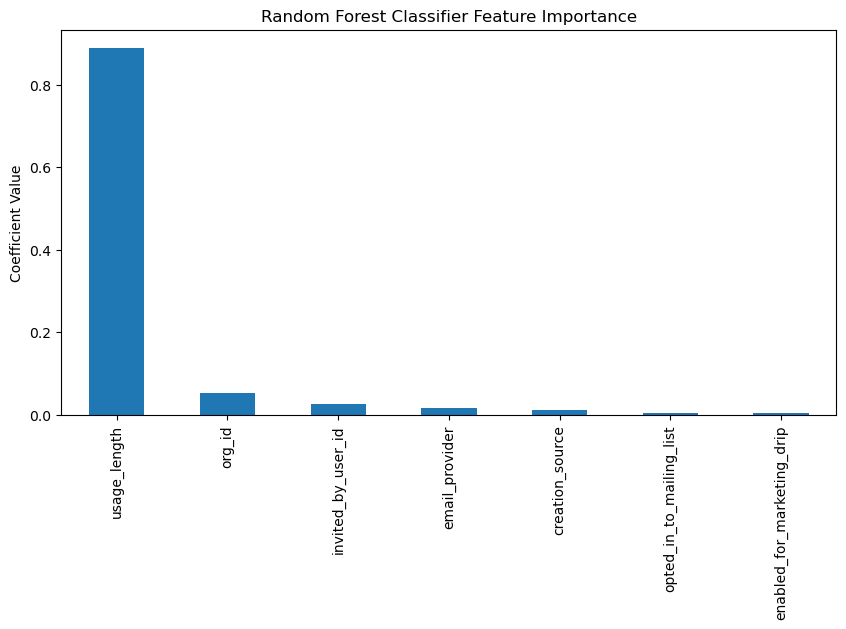

In [33]:
# plot the results
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
(feature_importance['coef']).nlargest(10).plot(kind = 'bar', x = feature_importance.index)
plt.title('Random Forest Classifier Feature Importance')
plt.ylabel('Coefficient Value')
plt.show()

According to this analysis, `RandomForestClassifier` identified the time between when a user signed up and their last active session to be the greatest indicator of whether or not they became an active user. Let's take a look at the time usage between non-adopted users and adopted users.

In [34]:
adopted = features_df['usage_length'].loc[features_df['adopted_user']==1]
non_adopted = features_df['usage_length'].loc[features_df['adopted_user']==0]

In [35]:
# We will plot ecdf distributions for both adopted and non-adopted users
from statsmodels.distributions.empirical_distribution import ECDF
res_adopted = ECDF(adopted)
res_non_adopted = ECDF(non_adopted)

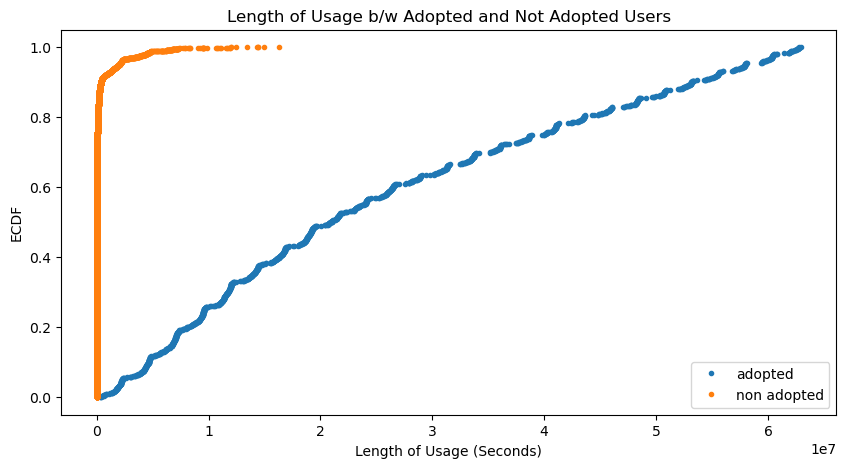

In [36]:
# set fig size
%matplotlib inline
plt.figure(figsize=(10,5))

plt.plot(res_adopted.x, res_adopted.y, marker = '.', linestyle = 'none')
plt.plot(res_non_adopted.x, res_non_adopted.y, marker = '.', linestyle = 'none')
plt.title('Length of Usage b/w Adopted and Not Adopted Users')
plt.xlabel('Length of Usage (Seconds)')
plt.ylabel('ECDF')
plt.legend(['adopted', 'non adopted'])
plt.show()

In [37]:
# define a function which converts seconds to hours

def convert(n):
    return str(datetime.timedelta(seconds=n))

n= 2 * 10**7
print(convert(n))

231 days, 11:33:20


From the preceding plot we see that at the maximum time usage of non-adopted users, approximately 60% of the active users had usage above that amount of time (approximately 230 days). 